In [34]:
import pandas as pd
import geopandas as gpd
from datetime import datetime

from shapely.geometry import Point

In [35]:
pd.options.display.max_columns = None

In [36]:
df = pd.read_csv(
    'historical_outages.csv',
     dtype={
         'PostalCode': object
     }
)

In [40]:
#Number of entries with missing "PostalCode" value.

df['PostalCode'].isna().sum()

3116

In [41]:
# Only retain values with zipcodes.

df_with_zips = df[~df['PostalCode'].isna()]

In [42]:
# MATCH PostalCode format to the rest of the database. 

no_zip = df[df['PostalCode'].isna()].reset_index(drop=True)

In [45]:
# no_zip.to_csv("no_zip.csv")

## Create a new 'zipcode' column based on Latitutde and Longitude.

In [46]:
# create a geometry column
geometry = [Point(xy) for xy in zip(no_zip['Longitude'], no_zip['Latitude'])]

crs = "EPSG:4269"

no_zip_gdf = gpd.GeoDataFrame(no_zip, crs=crs, geometry=geometry)

In [47]:
zipcodes = gpd.read_file("tl_2020_us_zcta520/tl_2020_us_zcta520.shp")

In [48]:
zipcodes.head(5)

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.65390, -88.24713 33.654..."
1,35616,35616,B5,G6350,S,559506992,41870756,+34.7395036,-088.0193814,"POLYGON ((-88.13997 34.58184, -88.13995 34.582..."
2,35621,35621,B5,G6350,S,117838488,409438,+34.3350314,-086.7270557,"POLYGON ((-86.81659 34.34960, -86.81649 34.349..."
3,35651,35651,B5,G6350,S,104521045,574316,+34.4609087,-087.4801507,"POLYGON ((-87.53087 34.42492, -87.53082 34.429..."
4,36010,36010,B5,G6350,S,335675180,236811,+31.6598950,-085.8128958,"POLYGON ((-85.95712 31.67744, -85.95676 31.677..."


In [49]:
zipcodes.to_crs(no_zip_gdf.crs, inplace=True)

In [50]:
outage_with_zips = gpd.sjoin(no_zip_gdf, zipcodes, how="inner", predicate="within")

In [51]:
outage_with_zips["ZCTA5CE20"]

0       10007
3       10007
4       10007
24      10007
25      10007
        ...  
2963    10075
2983    14560
3002    10607
3051    10011
3064    10472
Name: ZCTA5CE20, Length: 3097, dtype: object

In [52]:
outage_with_zips["PostalCode"] = outage_with_zips["ZCTA5CE20"]
new_zip = outage_with_zips[df.columns]

In [54]:
# Surveying values that were not mapped to the zipcode shapes.

not_mapped = no_zip[~no_zip.TimeStampCrawled.isin(outage_with_zips.TimeStampCrawled)]
# not_mapped.to_csv("not_mapped.csv")

In [55]:
not_mapped

,GoogleMapsAddress,TimeCrawled,PostalCode,Latitude,Longitude,StreetNumber,StreetAddress,Neighborhood,Borough,County,State,PostalSuffix,CurrentOverallRanking,PlaceID,OutageCustomers,Problem,CrewStatus,Cause,UniqueID,DateCrawled,TimeStampCrawled,DateFixed,geometry
2757,10,35:24.0,NaN,40.695008,-74.012385,NaN,NaN,NaN,New York's 10th Congressional District,NaN,New York,NaN,NaN,ChIJdQeMZoVcwokRukrmBywStHk,2,Partial Outage,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-02-14T05:00:00.000Z,1644834925,2022-02-14T20:12:33.000Z,POINT (-74.01239 40.69501)
2786,10,38:05.0,NaN,40.695008,-74.012385,NaN,NaN,NaN,New York's 10th Congressional District,NaN,New York,NaN,NaN,ChIJdQeMZoVcwokRukrmBywStHk,1,No Lights,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-02-11T05:00:00.000Z,1644619086,2022-02-12T11:01:35.000Z,POINT (-74.01239 40.69501)
2813,10,10:59.0,NaN,40.695008,-74.012385,NaN,NaN,NaN,New York's 10th Congressional District,NaN,New York,NaN,NaN,ChIJdQeMZoVcwokRukrmBywStHk,1,Area Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-02-09T05:00:00.000Z,1644444660,2022-02-10T07:51:32.000Z,POINT (-74.01239 40.69501)
2830,10,04:29.0,NaN,40.695008,-74.012385,NaN,NaN,NaN,New York's 10th Congressional District,NaN,New York,NaN,NaN,ChIJdQeMZoVcwokRukrmBywStHk,1,Partial Outage,Crews have arrived and are making repairs. Pow...,We'll provide details when we complete the inv...,1,2022-02-01T05:00:00.000Z,1643688270,2022-02-01T14:55:35.000Z,POINT (-74.01239 40.69501)
2831,10,18:10.0,NaN,40.695008,-74.012385,NaN,NaN,NaN,New York's 10th Congressional District,NaN,New York,NaN,NaN,ChIJdQeMZoVcwokRukrmBywStHk,2,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-02-01T05:00:00.000Z,1643728691,2022-02-01T23:57:17.000Z,POINT (-74.01239 40.69501)
2842,10,07:11.0,NaN,40.695008,-74.012385,NaN,NaN,NaN,New York's 10th Congressional District,NaN,New York,NaN,NaN,ChIJdQeMZoVcwokRukrmBywStHk,1,Area Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-01-31T05:00:00.000Z,1643609232,2022-02-01T02:53:01.000Z,POINT (-74.01239 40.69501)
2848,17,59:58.0,NaN,41.181482,-73.935982,NaN,NaN,NaN,New York's 17th Congressional District,NaN,New York,NaN,NaN,ChIJXQReNVDvwokRtjjYv75cykY,2,Partial Outage,Crews have arrived and are making repairs. Pow...,Weather-Related,1,2022-01-31T05:00:00.000Z,1643608799,2022-01-31T17:51:13.000Z,POINT (-73.93598 41.18148)
2869,10,04:21.0,NaN,40.695008,-74.012385,NaN,NaN,NaN,New York's 10th Congressional District,NaN,New York,NaN,NaN,ChIJdQeMZoVcwokRukrmBywStHk,1,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-01-29T05:00:00.000Z,1643436262,2022-01-29T17:41:38.000Z,POINT (-74.01239 40.69501)
2923,10,13:43.0,NaN,40.695008,-74.012385,NaN,NaN,NaN,New York's 10th Congressional District,NaN,New York,NaN,NaN,ChIJdQeMZoVcwokRukrmBywStHk,1,No Lights,Crews will be dispatched soon. We'll provide a...,Emergency Repairs,1,2022-01-26T05:00:00.000Z,1643206424,2022-01-26T23:28:39.000Z,POINT (-74.01239 40.69501)
2930,10,49:16.0,NaN,40.695008,-74.012385,NaN,NaN,NaN,New York's 10th Congressional District,NaN,New York,NaN,NaN,ChIJdQeMZoVcwokRukrmBywStHk,2,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-01-25T05:00:00.000Z,1643122157,2022-01-26T08:25:42.000Z,POINT (-74.01239 40.69501)


In [56]:
outage_with_zips["ZCTA5CE20"].unique()

array(['10007', '11368', '11101', '10026', '11106', '11215', '11212',
       '11361', '10314', '11105', '11219', '11103', '11419', '07047',
       '11417', '11357', '11102', '11364', '14526', '10301', '11414',
       '10598', '10002', '11367', '11378', '11230', '07513', '11377',
       '10524', '10583', '11415', '10312', '10549', '12134', '11379',
       '11416', '10469', '11423', '10462', '10475', '11235', '11375',
       '06779', '10128', '11203', '11385', '11433', '11234', '11104',
       '10027', '10009', '10562', '10708', '14502', '10304', '11370',
       '90012', '11358', '11426', '11372', '10605', '08755', '10005',
       '10459', '10470', '11435', '10465', '10466', '11373', '10461',
       '14580', '11004', '14150', '11432', '10033', '10510', '11366',
       '11001', '11434', '10036', '10452', '01370', '10801', '10458',
       '10543', '11411', '14305', '11213', '10451', '10456', '10457',
       '07503', '11209', '11214', '10471', '11422', '10520', '11356',
       '10703', '112

In [57]:
new_df = pd.concat([df_with_zips, new_zip])

In [58]:
new_df = new_df[
    (new_df.PostalCode.astype(str).str[0] == '1')
    & (new_df.PostalCode.astype(str).str.len() >= 5)
]

In [59]:
df_with_zips.PostalCode

0        10004
1        10307
2        10307
3        10014
4        10014
         ...  
88604    10550
88605    12020
88606    10583
88607    11581
88608    10709
Name: PostalCode, Length: 85493, dtype: object

In [60]:
new_df = new_df.reset_index(drop=True)

In [61]:
# Clean up postal code with postal suffix.

new_df['PostalCode'] = new_df['PostalCode'].replace(['113546252'], '11354')
new_df['PostalCode'] = new_df['PostalCode'].replace(['100656007'], '10065')
new_df['PostalCode'] = new_df['PostalCode'].replace(['100214823'], '10021')
new_df['PostalCode'] = new_df['PostalCode'].replace(['113744354'], '11374')

## Calculate Fix Time Per Zip Code

In [63]:
new_df

,GoogleMapsAddress,TimeCrawled,PostalCode,Latitude,Longitude,StreetNumber,StreetAddress,Neighborhood,Borough,County,State,PostalSuffix,CurrentOverallRanking,PlaceID,OutageCustomers,Problem,CrewStatus,Cause,UniqueID,DateCrawled,TimeStampCrawled,DateFixed
0,10 WEST ST,51:57.0,10004,40.705548,-74.017662,10,West Street,NaN,Manhattan,New York County,New York,NaN,2093.0,ChIJHxxTHBJawokRD5na9tLlrEo,1,Building Outage,An outage has recently been reported in your a...,We'll provide details when we complete the inv...,1,2022-07-27T04:00:00.000Z,1658919118,2022-08-29T20:33:22.000Z
1,106 ASPINWALL ST,55:36.0,10307,40.505322,-74.248814,106,Aspinwall Street,Tottenville,Staten Island,Richmond County,New York,1627.0,2015.0,ChIJacY7dZrKw4kRtqA0HCoHk5M,1,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-07-17T04:00:00.000Z,1658087737,2022-08-29T20:33:30.000Z
2,107 ASPINWALL ST,55:36.0,10307,40.505372,-74.248281,107,Aspinwall Street,Tottenville,Staten Island,Richmond County,New York,1656.0,2015.0,ChIJpW5rCZrKw4kRx31UcugZ8QY,1,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-07-17T04:00:00.000Z,1658087737,2022-08-29T20:33:30.000Z
3,101 WEST ST,12:34.0,10014,40.711038,-74.014770,101,West Street,NaN,Manhattan,New York County,New York,NaN,2001.0,ChIJFUfHZRpawokRc38JM052D-M,1,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-07-27T04:00:00.000Z,1658920354,2022-08-29T20:33:23.000Z
4,105 WEST ST,12:41.0,10014,40.729286,-74.010547,105,West Street,NaN,Manhattan,New York County,New York,NaN,2001.0,EiQxMDUgV2VzdCBTdCwgTmV3IFlvcmssIE5ZIDEwMDE0LC...,1,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-07-27T04:00:00.000Z,1658920361,2022-08-29T20:33:29.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88368,11 YORK RD,51:49.0,10075,40.769449,-73.951862,NaN,York Avenue,NaN,Manhattan,New York County,New York,NaN,NaN,ChIJyYgBa8dYwokRsPMAziZqcMs,1,Partial Outage,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-01-22T05:00:00.000Z,1642873910,2022-01-23T05:11:09.000Z
88369,15,48:17.0,14560,42.637307,-77.595994,NaN,New York 15,NaN,NaN,NaN,New York,NaN,NaN,ChIJ23dnz0YQ0YkRhyJxQoopvZE,1,No Lights,An outage has recently been reported in your a...,We'll provide details when we complete the inv...,1,2022-01-19T05:00:00.000Z,1642589298,2022-01-19T21:50:15.000Z
88370,88 HARTSDALE RD,26:51.0,10607,41.044894,-73.810586,NaN,Hartsdale Road,NaN,NaN,Westchester County,New York,NaN,NaN,ChIJNUFhAR6VwokRwWn2WEJno4M,1,Partial Outage,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-01-16T05:00:00.000Z,1642336012,2022-01-16T23:09:50.000Z
88371,23,39:07.0,10011,40.745306,-73.998475,NaN,West 23rd Street,NaN,Manhattan,New York County,New York,NaN,NaN,ChIJZ3jZULpZwokRDfWMrL7IMgk,21,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-01-13T05:00:00.000Z,1642106348,2022-01-14T04:56:53.000Z


In [64]:
# Convert Epoch to ISO-8601

def epoch_to_iso(t):
    dt = datetime.utcfromtimestamp(t)
    iso_format = dt.isoformat() + '.000Z'
    return iso_format

In [65]:
time_crawled = new_df["TimeStampCrawled"].apply(epoch_to_iso)

In [66]:
time_crawled

0        2022-07-27T10:51:58.000Z
1        2022-07-17T19:55:37.000Z
2        2022-07-17T19:55:37.000Z
3        2022-07-27T11:12:34.000Z
4        2022-07-27T11:12:41.000Z
                   ...           
88368    2022-01-22T17:51:50.000Z
88369    2022-01-19T10:48:18.000Z
88370    2022-01-16T12:26:52.000Z
88371    2022-01-13T20:39:08.000Z
88372    2022-01-11T00:34:40.000Z
Name: TimeStampCrawled, Length: 88373, dtype: object

In [67]:
new_df['new_time_crawled'] = time_crawled

In [68]:
new_df

,GoogleMapsAddress,TimeCrawled,PostalCode,Latitude,Longitude,StreetNumber,StreetAddress,Neighborhood,Borough,County,State,PostalSuffix,CurrentOverallRanking,PlaceID,OutageCustomers,Problem,CrewStatus,Cause,UniqueID,DateCrawled,TimeStampCrawled,DateFixed,new_time_crawled
0,10 WEST ST,51:57.0,10004,40.705548,-74.017662,10,West Street,NaN,Manhattan,New York County,New York,NaN,2093.0,ChIJHxxTHBJawokRD5na9tLlrEo,1,Building Outage,An outage has recently been reported in your a...,We'll provide details when we complete the inv...,1,2022-07-27T04:00:00.000Z,1658919118,2022-08-29T20:33:22.000Z,2022-07-27T10:51:58.000Z
1,106 ASPINWALL ST,55:36.0,10307,40.505322,-74.248814,106,Aspinwall Street,Tottenville,Staten Island,Richmond County,New York,1627.0,2015.0,ChIJacY7dZrKw4kRtqA0HCoHk5M,1,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-07-17T04:00:00.000Z,1658087737,2022-08-29T20:33:30.000Z,2022-07-17T19:55:37.000Z
2,107 ASPINWALL ST,55:36.0,10307,40.505372,-74.248281,107,Aspinwall Street,Tottenville,Staten Island,Richmond County,New York,1656.0,2015.0,ChIJpW5rCZrKw4kRx31UcugZ8QY,1,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-07-17T04:00:00.000Z,1658087737,2022-08-29T20:33:30.000Z,2022-07-17T19:55:37.000Z
3,101 WEST ST,12:34.0,10014,40.711038,-74.014770,101,West Street,NaN,Manhattan,New York County,New York,NaN,2001.0,ChIJFUfHZRpawokRc38JM052D-M,1,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-07-27T04:00:00.000Z,1658920354,2022-08-29T20:33:23.000Z,2022-07-27T11:12:34.000Z
4,105 WEST ST,12:41.0,10014,40.729286,-74.010547,105,West Street,NaN,Manhattan,New York County,New York,NaN,2001.0,EiQxMDUgV2VzdCBTdCwgTmV3IFlvcmssIE5ZIDEwMDE0LC...,1,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-07-27T04:00:00.000Z,1658920361,2022-08-29T20:33:29.000Z,2022-07-27T11:12:41.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88368,11 YORK RD,51:49.0,10075,40.769449,-73.951862,NaN,York Avenue,NaN,Manhattan,New York County,New York,NaN,NaN,ChIJyYgBa8dYwokRsPMAziZqcMs,1,Partial Outage,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-01-22T05:00:00.000Z,1642873910,2022-01-23T05:11:09.000Z,2022-01-22T17:51:50.000Z
88369,15,48:17.0,14560,42.637307,-77.595994,NaN,New York 15,NaN,NaN,NaN,New York,NaN,NaN,ChIJ23dnz0YQ0YkRhyJxQoopvZE,1,No Lights,An outage has recently been reported in your a...,We'll provide details when we complete the inv...,1,2022-01-19T05:00:00.000Z,1642589298,2022-01-19T21:50:15.000Z,2022-01-19T10:48:18.000Z
88370,88 HARTSDALE RD,26:51.0,10607,41.044894,-73.810586,NaN,Hartsdale Road,NaN,NaN,Westchester County,New York,NaN,NaN,ChIJNUFhAR6VwokRwWn2WEJno4M,1,Partial Outage,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-01-16T05:00:00.000Z,1642336012,2022-01-16T23:09:50.000Z,2022-01-16T12:26:52.000Z
88371,23,39:07.0,10011,40.745306,-73.998475,NaN,West 23rd Street,NaN,Manhattan,New York County,New York,NaN,NaN,ChIJZ3jZULpZwokRDfWMrL7IMgk,21,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-01-13T05:00:00.000Z,1642106348,2022-01-14T04:56:53.000Z,2022-01-13T20:39:08.000Z


In [69]:
# Calculate length of blackout

length = pd.to_datetime(new_df['DateFixed']) - pd.to_datetime(new_df['new_time_crawled'])

In [70]:
new_df['length'] = length

In [71]:
def convert_timedelta(t):
    minutes = t.total_seconds() / 60
    return minutes

In [72]:
new_df['length'].sort_values().head(25)

4172    0 days 00:19:34
4171    0 days 00:19:35
4173    0 days 00:19:36
74796   0 days 00:21:38
74784   0 days 00:23:25
13352   0 days 00:24:25
74798   0 days 00:24:58
74823   0 days 00:25:24
44259   0 days 00:26:53
40134   0 days 00:28:58
41995   0 days 00:48:04
22908   0 days 00:48:04
18567   0 days 00:55:21
43325   0 days 01:37:42
19347   0 days 01:48:25
24069   0 days 02:03:18
17387   0 days 02:07:15
23313   0 days 02:08:03
23311   0 days 02:08:05
23312   0 days 02:08:05
23321   0 days 02:08:08
23320   0 days 02:08:09
23322   0 days 02:08:11
19160   0 days 02:08:12
23314   0 days 02:11:59
Name: length, dtype: timedelta64[ns]

In [73]:
new_df.Borough.unique()

array(['Manhattan', 'Staten Island', 'Queens', 'Brooklyn', 'The Bronx',
       'Bronx', nan, "New York's 8th Congressional District",
       "New York's 14th Congressional District",
       "New York's 13th Congressional District",
       "New York's 16th Congressional District",
       "New York's 22nd Congressional District",
       "New York's 18th Congressional District",
       "New York's 24th Congressional District"], dtype=object)

<AxesSubplot: >

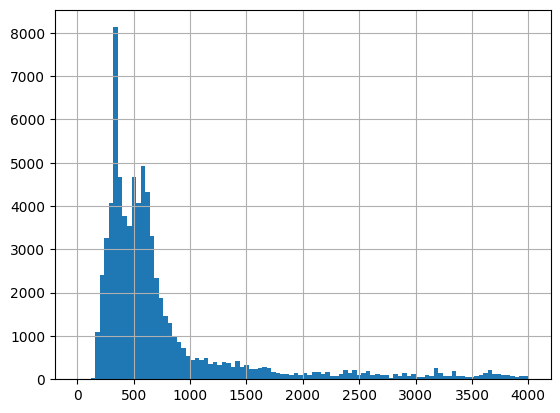

In [74]:
new_df['length'].apply(convert_timedelta).hist(bins=100, range=[0, 4000])

In [75]:
new_df['length_minutes'] = new_df['length'].apply(convert_timedelta)

In [76]:
new_df.sort_values(by='length_minutes').head(25)

,GoogleMapsAddress,TimeCrawled,PostalCode,Latitude,Longitude,StreetNumber,StreetAddress,Neighborhood,Borough,County,State,PostalSuffix,CurrentOverallRanking,PlaceID,OutageCustomers,Problem,CrewStatus,Cause,UniqueID,DateCrawled,TimeStampCrawled,DateFixed,new_time_crawled,length,length_minutes
4172,11444 222 ST,57:26.0,11411,40.700409,-73.735615,114-44,222nd Street,Jamaica,Queens,Queens County,New York,1202.0,321.0,ChIJedZ_rsJjwokRON5x7TLEVy4,1,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-06-01T04:00:00.000Z,1654124247,2022-06-01T23:17:01.000Z,2022-06-01T22:57:27.000Z,0 days 00:19:34,19.566667
4171,11440 222 ST,57:26.0,11411,40.700511,-73.735719,114-40,222nd Street,Jamaica,Queens,Queens County,New York,1202.0,321.0,ChIJIavircJjwokR-Cgr0NMbr4g,1,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-06-01T04:00:00.000Z,1654124246,2022-06-01T23:17:01.000Z,2022-06-01T22:57:26.000Z,0 days 00:19:35,19.583333
4173,11448 222 ST,57:26.0,11411,40.700311,-73.735673,114-48,222nd Street,Jamaica,Queens,Queens County,New York,1202.0,321.0,ChIJ16obrMJjwokREZEOR3GPTTo,1,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-06-01T04:00:00.000Z,1654124246,2022-06-01T23:17:02.000Z,2022-06-01T22:57:26.000Z,0 days 00:19:36,19.600000
74796,291A MONROE ST,55:39.0,11216,40.686154,-73.946619,291A,Monroe Street,Bedford-Stuyvesant,Brooklyn,Kings County,New York,1555.0,NaN,ChIJ41bV5Y1bwokR1tr2wdlZeuM,1,Partial Outage,Crews have arrived and are making repairs. Pow...,Weather-Related,1,2022-06-01T04:00:00.000Z,1654124139,2022-06-01T23:17:17.000Z,2022-06-01T22:55:39.000Z,0 days 00:21:38,21.633333
74784,15 SCARSDALE FARM RD,53:40.0,10583,40.997537,-73.823734,NaN,Scarsdale Farm Road,NaN,NaN,Westchester County,New York,NaN,NaN,ChIJMflbW0OTwokRWE9j9RFXZbU,1,Area Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-06-01T04:00:00.000Z,1654124021,2022-06-01T23:17:06.000Z,2022-06-01T22:53:41.000Z,0 days 00:23:25,23.416667
13352,15078 15 DR,52:41.0,11357,40.786416,-73.810752,15078,15th Drive,Whitestone,Queens,Queens County,New York,2640.0,96.0,ChIJ6_gVvJOKwokRtjM2zHmQGS8,1,Partial Outage,Crews will be dispatched soon. We'll provide a...,Weather-Related,1,2022-06-01T04:00:00.000Z,1654123961,2022-06-01T23:17:06.000Z,2022-06-01T22:52:41.000Z,0 days 00:24:25,24.416667
74798,3013 MATTHEWS AV,52:19.0,10467,40.870300,-73.862696,3013,Matthews Avenue,Williamsbridge,Bronx,Bronx County,New York,8659.0,NaN,ChIJW3OeM0LzwokRKkFWedd3LGA,1,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-06-01T04:00:00.000Z,1654123939,2022-06-01T23:17:17.000Z,2022-06-01T22:52:19.000Z,0 days 00:24:58,24.966667
74823,4240 MURRAY ST,51:56.0,11355,40.759996,-73.812093,42-40,Murray Street,Flushing,Queens,Queens County,New York,1054.0,NaN,ChIJuZ1gUTtgwokRe-m1gxfaBX8,1,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-06-01T04:00:00.000Z,1654123917,2022-06-01T23:17:21.000Z,2022-06-01T22:51:57.000Z,0 days 00:25:24,25.400000
44259,7111 35 AV,55:20.0,11372,40.750979,-73.894446,71-11,35th Avenue,Flushing,Queens,Queens County,New York,3909.0,14.0,ChIJe795cwZfwokRfbm-jdAjrxc,1,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-04-28T04:00:00.000Z,1651168521,2022-04-28T18:22:14.000Z,2022-04-28T17:55:21.000Z,0 days 00:26:53,26.883333
40134,17 GABRIEL DR,53:12.0,10469,40.863841,-73.850739,17,Gabriel Drive,Pelham Gardens,Bronx,Bronx County,New York,5648.0,18.0,ChIJ9WK0MlDzwokR8OoJR0nhgl4,1,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-04-28T04:00:00.000Z,1651168393,2

In [77]:
# new_df.to_csv("cleaned_df.csv")

In [78]:
simple_df = new_df[['GoogleMapsAddress', 'PostalCode', 'Latitude', 'Longitude', 'StreetAddress', 'Neighborhood', 'Borough', 'County', 'State', 'OutageCustomers', 'Cause', 'UniqueID', 'new_time_crawled', 'DateFixed', 'length', 'length_minutes']]



In [79]:
simple_df

,GoogleMapsAddress,PostalCode,Latitude,Longitude,StreetAddress,Neighborhood,Borough,County,State,OutageCustomers,Cause,UniqueID,new_time_crawled,DateFixed,length,length_minutes
0,10 WEST ST,10004,40.705548,-74.017662,West Street,NaN,Manhattan,New York County,New York,1,We'll provide details when we complete the inv...,1,2022-07-27T10:51:58.000Z,2022-08-29T20:33:22.000Z,33 days 09:41:24,48101.400000
1,106 ASPINWALL ST,10307,40.505322,-74.248814,Aspinwall Street,Tottenville,Staten Island,Richmond County,New York,1,We'll provide details when we complete the inv...,1,2022-07-17T19:55:37.000Z,2022-08-29T20:33:30.000Z,43 days 00:37:53,61957.883333
2,107 ASPINWALL ST,10307,40.505372,-74.248281,Aspinwall Street,Tottenville,Staten Island,Richmond County,New York,1,We'll provide details when we complete the inv...,1,2022-07-17T19:55:37.000Z,2022-08-29T20:33:30.000Z,43 days 00:37:53,61957.883333
3,101 WEST ST,10014,40.711038,-74.014770,West Street,NaN,Manhattan,New York County,New York,1,We'll provide details when we complete the inv...,1,2022-07-27T11:12:34.000Z,2022-08-29T20:33:23.000Z,33 days 09:20:49,48080.816667
4,105 WEST ST,10014,40.729286,-74.010547,West Street,NaN,Manhattan,New York County,New York,1,We'll provide details when we complete the inv...,1,2022-07-27T11:12:41.000Z,2022-08-29T20:33:29.000Z,33 days 09:20:48,48080.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88368,11 YORK RD,10075,40.769449,-73.951862,York Avenue,NaN,Manhattan,New York County,New York,1,We'll provide details when we complete the inv...,1,2022-01-22T17:51:50.000Z,2022-01-23T05:11:09.000Z,0 days 11:19:19,679.316667
88369,15,14560,42.637307,-77.595994,New York 15,NaN,NaN,NaN,New York,1,We'll provide details when we complete the inv...,1,2022-01-19T10:48:18.000Z,2022-01-19T21:50:15.000Z,0 days 11:01:57,661.950000
88370,88 HARTSDALE RD,10607,41.044894,-73.810586,Hartsdale Road,NaN,NaN,Westchester County,New York,1,We'll provide details when we complete the inv...,1,2022-01-16T12:26:52.000Z,2022-01-16T23:09:50.000Z,0 days 10:42:58,642.966667
88371,23,10011,40.745306,-73.998475,West 23rd Street,NaN,Manhattan,New York County,New York,21,We'll provide details when we complete the inv...,1,2022-01-13T20:39:08.000Z,2022-01-14T04:56:53.000Z,0 days 08:17:45,497.750000


In [80]:
length_post = simple_df[['PostalCode', 'length_minutes']]

In [82]:
avg_length_by_zip = length_post.groupby('PostalCode').mean()

In [83]:
med_length_by_zip = length_post.groupby('PostalCode').median()

In [84]:
avg_length_by_zip

,length_minutes
PostalCode,
10001,5247.257422
10002,2982.262355
10003,4578.681659
10004,5296.161574
10005,6506.641139
...,...
14737,381.533333
14750,582.750000
14845,496.500000


In [85]:
length_post.pivot_table(index='PostalCode', values='length_minutes', aggfunc=['mean', 'median', 'min', 'max', 'count'])

,mean,median,min,max,count
,length_minutes,length_minutes,length_minutes,length_minutes,length_minutes
PostalCode,,,,,
10001,5247.257422,657.975000,221.683333,62290.750000,128
10002,2982.262355,684.283333,191.666667,62730.150000,402
10003,4578.681659,630.816667,198.966667,51571.850000,229
10004,5296.161574,3856.741667,308.983333,48102.650000,72
10005,6506.641139,579.200000,188.433333,50703.983333,79
...,...,...,...,...,...
14737,381.533333,381.533333,381.533333,381.533333,1
14750,582.750000,582.750000,582.750000,582.750000,1


In [86]:
# avg_length_by_zip.to_csv("avg_length_by_zip.csv")

In [87]:
# med_length_by_zip.to_csv("med_length_by_zip.csv")

In [88]:
# pd.read_csv('power_outage_complaints.csv')

## Weight each outage by customers affected.

In [89]:
# new_df is a cleaned con ed outage data with reconstructed postcode input.

new_df

,GoogleMapsAddress,TimeCrawled,PostalCode,Latitude,Longitude,StreetNumber,StreetAddress,Neighborhood,Borough,County,State,PostalSuffix,CurrentOverallRanking,PlaceID,OutageCustomers,Problem,CrewStatus,Cause,UniqueID,DateCrawled,TimeStampCrawled,DateFixed,new_time_crawled,length,length_minutes
0,10 WEST ST,51:57.0,10004,40.705548,-74.017662,10,West Street,NaN,Manhattan,New York County,New York,NaN,2093.0,ChIJHxxTHBJawokRD5na9tLlrEo,1,Building Outage,An outage has recently been reported in your a...,We'll provide details when we complete the inv...,1,2022-07-27T04:00:00.000Z,1658919118,2022-08-29T20:33:22.000Z,2022-07-27T10:51:58.000Z,33 days 09:41:24,48101.400000
1,106 ASPINWALL ST,55:36.0,10307,40.505322,-74.248814,106,Aspinwall Street,Tottenville,Staten Island,Richmond County,New York,1627.0,2015.0,ChIJacY7dZrKw4kRtqA0HCoHk5M,1,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-07-17T04:00:00.000Z,1658087737,2022-08-29T20:33:30.000Z,2022-07-17T19:55:37.000Z,43 days 00:37:53,61957.883333
2,107 ASPINWALL ST,55:36.0,10307,40.505372,-74.248281,107,Aspinwall Street,Tottenville,Staten Island,Richmond County,New York,1656.0,2015.0,ChIJpW5rCZrKw4kRx31UcugZ8QY,1,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-07-17T04:00:00.000Z,1658087737,2022-08-29T20:33:30.000Z,2022-07-17T19:55:37.000Z,43 days 00:37:53,61957.883333
3,101 WEST ST,12:34.0,10014,40.711038,-74.014770,101,West Street,NaN,Manhattan,New York County,New York,NaN,2001.0,ChIJFUfHZRpawokRc38JM052D-M,1,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-07-27T04:00:00.000Z,1658920354,2022-08-29T20:33:23.000Z,2022-07-27T11:12:34.000Z,33 days 09:20:49,48080.816667
4,105 WEST ST,12:41.0,10014,40.729286,-74.010547,105,West Street,NaN,Manhattan,New York County,New York,NaN,2001.0,EiQxMDUgV2VzdCBTdCwgTmV3IFlvcmssIE5ZIDEwMDE0LC...,1,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-07-27T04:00:00.000Z,1658920361,2022-08-29T20:33:29.000Z,2022-07-27T11:12:41.000Z,33 days 09:20:48,48080.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88368,11 YORK RD,51:49.0,10075,40.769449,-73.951862,NaN,York Avenue,NaN,Manhattan,New York County,New York,NaN,NaN,ChIJyYgBa8dYwokRsPMAziZqcMs,1,Partial Outage,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-01-22T05:00:00.000Z,1642873910,2022-01-23T05:11:09.000Z,2022-01-22T17:51:50.000Z,0 days 11:19:19,679.316667
88369,15,48:17.0,14560,42.637307,-77.595994,NaN,New York 15,NaN,NaN,NaN,New York,NaN,NaN,ChIJ23dnz0YQ0YkRhyJxQoopvZE,1,No Lights,An outage has recently been reported in your a...,We'll provide details when we complete the inv...,1,2022-01-19T05:00:00.000Z,1642589298,2022-01-19T21:50:15.000Z,2022-01-19T10:48:18.000Z,0 days 11:01:57,661.950000
88370,88 HARTSDALE RD,26:51.0,10607,41.044894,-73.810586,NaN,Hartsdale Road,NaN,NaN,Westchester County,New York,NaN,NaN,ChIJNUFhAR6VwokRwWn2WEJno4M,1,Partial Outage,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-01-16T05:00:00.000Z,1642336012,2022-01-16T23:09:50.000Z,2022-01-16T12:26:52.000Z,0 days 10:42:58,642.966667
88371,23,39:07.0,10011,40.745306,-73.998475,NaN,West 23rd Street,NaN,Manhattan,New York County,New York,NaN,NaN,ChIJZ3jZULpZwokRDfWMrL7IMgk,21,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-01-13T05:00:00.000Z,1642106348,2022-01-14T04:56:53.000Z,2022-01-13T20:39:08.000Z,0 days 08:17:45,497.750000


In [159]:
nyc_zip = pd.read_csv('dhrumil_nyc_zip_pop/ACSDT5Y2020.B01003-2022-11-13T181254.csv')

# Convert nyc_zip into workable dataframe format.

nyc_zip_dict = {
    "Zipcode" : [],
    "Estimate" : [],
    "Margin of Error" : []
}

def get_column_name(idx):
    column_names = {
        0: 'Zipcode',
        1: 'Estimate',
        2: 'Margin of Error'
    }
    
    return column_names[(idx % 3)]

for idx, row in nyc_zip.iterrows():
    column_name = get_column_name(idx)
    if column_name == 'Zipcode':
        nyc_zip_dict[column_name].append(row['Label (Grouping)'].split()[1])
    else:
        nyc_zip_dict[column_name].append(row['Total'].replace(",", "").replace("±", ""))

df_nyc_zip = pd.DataFrame(nyc_zip_dict).astype(int)

df_nyc_zip["Lower Estimate"] = df_nyc_zip["Estimate"] - df_nyc_zip["Margin of Error"]
df_nyc_zip.loc[df_nyc_zip['Lower Estimate'] < 0, "Lower Estimate"] = 0
df_nyc_zip["Upper Estimate"] = df_nyc_zip["Estimate"] + df_nyc_zip["Margin of Error"]

# df_nyc_zip.to_csv('df_nyc_zip.csv')

In [151]:
customers_affected = new_df[['OutageCustomers', 'PostalCode']]
customers_affected_by_zip = customers_affected.groupby('PostalCode').sum().reset_index().astype(int)

In [152]:
customers_affected_by_zip_nyc = pd.merge(
    customers_affected_by_zip,
    df_nyc_zip,
    how="inner",
    left_on="PostalCode",
    right_on="Zipcode"
)

In [153]:
customers_affected_by_zip_nyc["Percent Estimate"] = (
    customers_affected_by_zip_nyc["OutageCustomers"]
    / customers_affected_by_zip_nyc["Estimate"]
    * 100
)

customers_affected_by_zip_nyc["Percent Upper Estimate"] = (
    customers_affected_by_zip_nyc["OutageCustomers"]
    / customers_affected_by_zip_nyc["Upper Estimate"]
    * 100
)

customers_affected_by_zip_nyc["Percent Lower Estimate"] = (
    customers_affected_by_zip_nyc["OutageCustomers"]
    / customers_affected_by_zip_nyc["Lower Estimate"]
    * 100
)

In [155]:
customers_affected_by_zip_nyc["Percent Margin of Error"] = customers_affected_by_zip_nyc["Percent Estimate"] - customers_affected_by_zip_nyc["Percent Upper Estimate"]

In [156]:
customers_affected_by_zip_nyc[[
    "Zipcode",
    "OutageCustomers",
    "Lower Estimate",
    "Estimate",
    "Upper Estimate",
    "Margin of Error",
    "Percent Lower Estimate",
    "Percent Estimate",
    "Percent Upper Estimate",
    "Percent Margin of Error"
]]

,Zipcode,OutageCustomers,Lower Estimate,Estimate,Upper Estimate,Margin of Error,Percent Lower Estimate,Percent Estimate,Percent Upper Estimate,Percent Margin of Error
0,10001,549,23267,25026,26785,1759,2.359565,2.193719,2.049655,0.144064
1,10002,1092,71180,74363,77546,3183,1.534139,1.468472,1.408196,0.060276
2,10003,967,52103,54671,57239,2568,1.855939,1.768762,1.689408,0.079355
3,10004,95,2652,3310,3968,658,3.582202,2.870091,2.394153,0.475937
4,10005,106,7758,8664,9570,906,1.366332,1.223453,1.107628,0.115825
...,...,...,...,...,...,...,...,...,...,...
187,11451,4,0,0,12,12,inf,inf,33.333333,inf
188,11691,115,65262,68454,71646,3192,0.176213,0.167996,0.160511,0.007485
189,11693,135,11778,13029,14280,1251,1.146205,1.036150,0.945378,0.090772
190,11694,19,19575,21258,22941,1683,0.097063,0.089378,0.082821,0.006557


In [160]:
# customers_affected_by_zip_nyc.to_csv('customers_affected_by_zip_nyc.csv')